In [1]:
import sys
print(sys.version)

3.11.11 (main, Jan  5 2025, 05:35:58) [MSC v.1942 64 bit (AMD64)]


In [30]:
from vnstock import Vnstock
from datetime import datetime
symbol = 'FPT'
start = '2022-01-01'
end = datetime.today().strftime('%Y-%m-%d')
stock = Vnstock().stock(symbol=symbol, source='VCI')
# stock.quote.history(start='2022-01-01', end='2024-05-25')
df = stock.quote.history(start=start, end=end)

2025-02-03 23:04:55 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [31]:
# Rename column 'time' to 'date'
df.rename(columns={'time': 'date'}, inplace=True)
df.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    766 non-null    datetime64[ns]
 1   open    766 non-null    float64       
 2   high    766 non-null    float64       
 3   low     766 non-null    float64       
 4   close   766 non-null    float64       
 5   volume  766 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 36.0 KB


In [32]:
import bt
print(bt.__version__)

1.1.0


In [33]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

In [34]:
# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, df)

In [ ]:
# we include test here to see the results side-by-side
res2 = bt.run(test2)

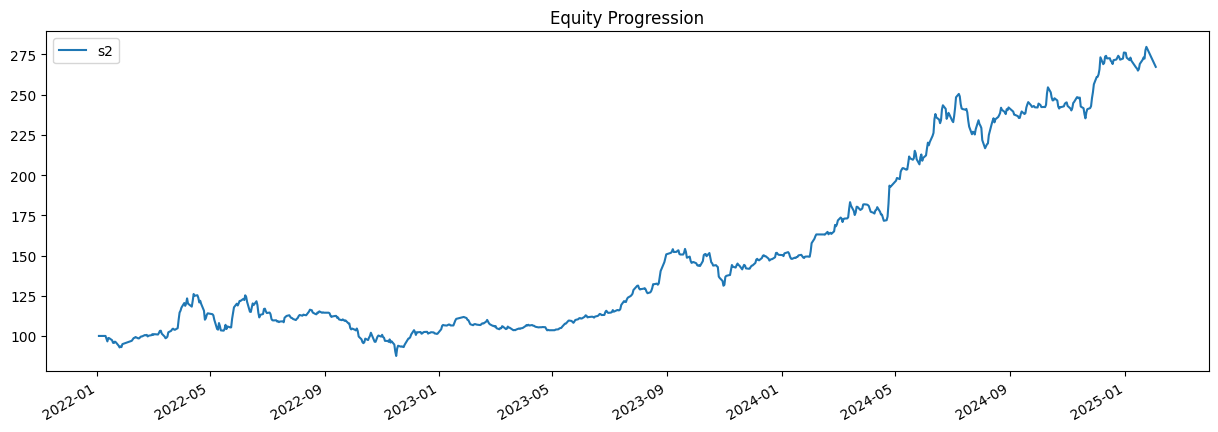

In [36]:
res2.plot();